We have a clean dataframe with the NFL and NCAA statistics that we need to start building models to predict NFL statistics. We'll try to make 4 models: one for quarterbacks, running backs, wide receivers and tight ends, and various defensive positions. We'll use visualizations to get an idea of how different NCAA statistics might relate to our outcome of interest and use multiple linear regression determine whether these college statistics are useful for predicting how a player will perform in the NFL.

Hopefully, we'll be able to determine whether there is a model that NFL coaches, owners, and scouts can use to predict how college players at different positions will perform in the NFL.

First we need to import all of the packages we'll use in the notebook. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

Now we have all of the packages we'll be using throughout the modelling process. Sklearn will allow us to use linear modelling functions, get R^2 values for our models, and scale any x or y values if needed. We'll use matplotlib and seaborn to produce visualizations that'll help in the modelling process.

We'll read in the cleaned dataframe that we'll use for building the models. We're also going to make a copy of it so that we have an original copy and one that we can manipulate.



In [2]:
# read in the data file
college_nfl_stats = pd.read_csv('nfl_ncaa_stats1.csv')

# drop the column called Unnamed
college_nfl_stats = college_nfl_stats.drop(columns='Unnamed: 0')

# make a copy
college_nfl_stats2 = college_nfl_stats.copy()
college_nfl_stats.head()

,playerId,nameFirst,nameLast,position,collegeId,Games played,nflId,Player Code,Team Code,Conference Code,...,NCAA Yards per Reception,NCAA Solo Tackle per Game,NCAA Assisted Tackle per Game,NCAA Tackle for Loss per Game,NCAA Yards per Tackle for Loss,NCAA Sacks per Game,NCAA Yards per Sack,NCAA Forced Fumbles per Game,NCAA Fumbles per Game,NCAA Broken up Pass per Game
0,20120112,Bobby,Massie,OT,38677,49,2533543,1024974,433,911,...,NaN,0.10,0.00,0.00,NaN,0.0,NaN,0.0,0.00,0.0
1,20130187,Andre,Ellington,RB,29631,35,2539217,1015945,147,821,...,8.58,0.08,0.00,0.00,NaN,0.0,NaN,0.0,0.18,0.0
2,20130763,Jaron,Brown,WR,29631,56,2541966,1015966,147,821,...,14.01,0.26,0.12,0.00,NaN,0.0,NaN,0.0,0.05,0.0
3,20140052,Troy,Niklas,TE,46556,30,2543628,1040904,513,99001,...,15.49,0.32,0.43,0.02,6.0,0.0,NaN,0.0,0.00,0.0
4,20140120,Logan,Thomas,QB,24061,42,2543767,1026854,742,821,...,5.50,0.09,0.02,0.00,NaN,0.0,NaN,0.0,0.53,0.0


The dataset is loaded in as a dataframe and we have a copy of it. When we printed it out there was a column called Unnamed: 0, so we dropped it as it's not needed.

Let's start with models for Quarterbacks. First, we need to make a dataframe that includes only quarterbacks. We'll try to predict Passing Yards per Game in the NFL, so we need to make a new column for passing yards per game. We have total NFL passing yards and the number of NFL games played, so we can divide total yards by number of games to make this new column. We're also going to change the Conference Code column to be a categorical variable as this makes more sense to use in the model.

We'll print out the columns at the end to make sure we made the new column correctly.

In [3]:
# make df with just qbs
qbs = college_nfl_stats2[college_nfl_stats2['position']=='QB']

# replace all infinity values
qbs = qbs.replace(to_replace=[np.inf, -np.inf], value=0)

#make the yds per game column and change data type of conference code column
qbs['NFL Yds per Game'] = qbs['NFL Passing Yards']/qbs['Games played']
qbs['Conference Code'] = qbs['Conference Code'].astype(object)
qbs

,playerId,nameFirst,nameLast,position,collegeId,Games played,nflId,Player Code,Team Code,Conference Code,...,NCAA Solo Tackle per Game,NCAA Assisted Tackle per Game,NCAA Tackle for Loss per Game,NCAA Yards per Tackle for Loss,NCAA Sacks per Game,NCAA Yards per Sack,NCAA Forced Fumbles per Game,NCAA Fumbles per Game,NCAA Broken up Pass per Game,NFL Yds per Game
4,20140120,Logan,Thomas,QB,24061,42,2543767,1026854,742,821,...,0.09,0.02,0.0,NaN,0.0,NaN,0.0,0.53,0.00,23.642857
20,20120088,Nick,Foles,QB,85721,26,2532842,1009818,29,905,...,0.03,0.00,0.0,NaN,0.0,NaN,0.0,0.37,0.00,751.730769
51,20110152,T.J.,Yates,QB,27599,12,2508123,1002277,457,821,...,0.00,0.00,0.0,NaN,0.0,NaN,0.0,0.24,0.00,490.916667
78,20110180,Tyrod,Taylor,QB,24061,35,2495240,1011843,742,821,...,0.05,0.00,0.0,NaN,0.0,NaN,0.0,0.38,0.00,490.171429
90,20130016,E.J.,Manuel,QB,32306,16,2539228,1016260,234,821,...,0.05,0.02,0.0,NaN,0.0,NaN,0.0,0.42,0.00,512.812500
94,20120689,Kellen,Moore,QB,83725,8,2532917,1008266,66,923,...,0.02,0.00,0.0,NaN,0.0,NaN,0.0,0.45,0.00,405.125000
100,20140032,Teddy,Bridgewater,QB,40292,31,2543465,1040051,367,823,...,0.03,0.00,0.0,NaN,0.0,NaN,0.0,0.23,0.00,320.064516
106,20130110,Ryan,Nassib,QB,13244,13,2539961,1018424,688,823,...,0.00,0.00,0.0,NaN,0.0,NaN,0.0,0.54,0.00,257.076923
119,20140163,Aaron,Murray,QB,30602,3,2543587,1024001,257,911,...,0.00,0.00,0.0,NaN,0.0,NaN,0.0,0.38,0.00,295.000000
140,20140183,David,Fales,QB,95192,13,2543751,1025146,630,923,...,0.00,0.00,0.0,NaN,0.0,NaN,0.0,0.24,0.00,184.076923


Now we have a dataframe with just quarterbacks and their statistics, and it contains the passing yards per game column.

When we printed out the dataframe (not seen in the output), some columns had infinity values, which can't be used in the model. We replaced them with 0s to avoid errors with the model output.

As seen in the output above, there are a lot of columns that do not pertain to quarterback statistics, and they most likely will not be useful when predicting NFL passing yards per game. We're going to keep only the columns that make sense to keep: NCAA pass completion (%), NCAA yards per completion, and NCAA passing touchdowns per game. We also need to keep NFL yards per game since it's our repsonse variable.

Once we've filtered the dataframe to keep just those columns, we'll make a pairplot to get a preliminary visualization of what variables might be related to each other.

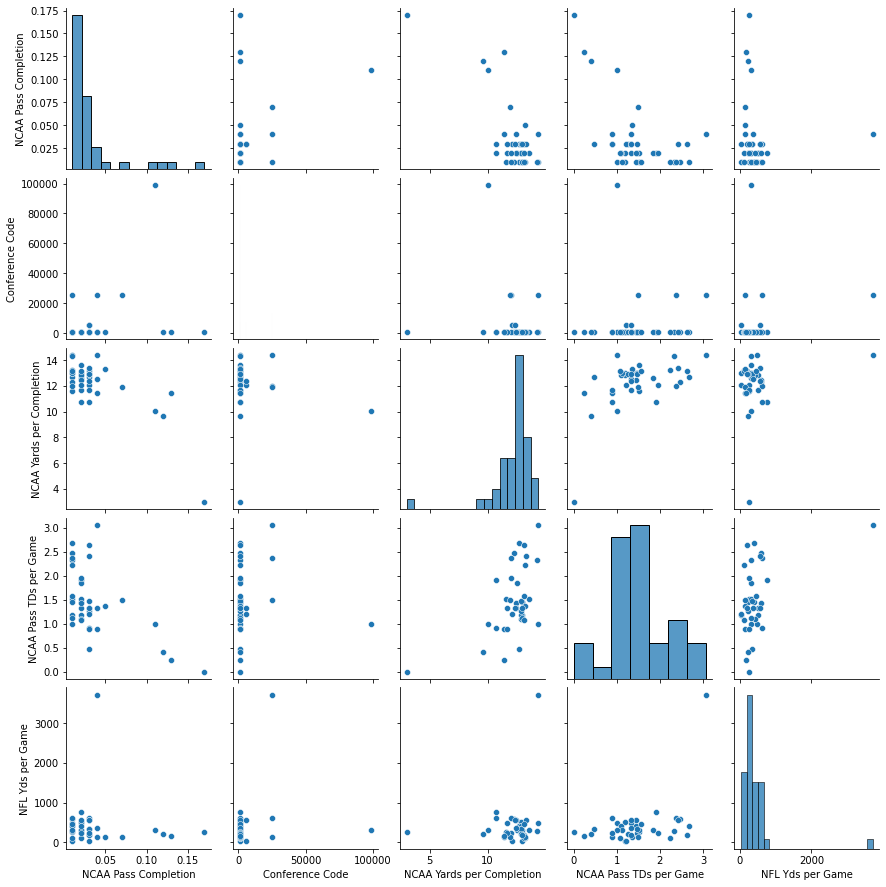

In [4]:
qbs = qbs[['NCAA Pass Completion', 'Conference Code',
       'NCAA Yards per Completion', 'NCAA Pass TDs per Game', 'NFL Yds per Game']]
sns.pairplot(qbs)

The quarterback dataframe has only the columns that make sense to use for predicting NFL passing yards per game. The plots in the bottom row show the relationship between the predictor and response variables.

There does not seem to be an strong linear relationships between NFL yards per game and the NCAA statistics. However, there is one outlier in the NFL passing yards per game: more than 3000. That could affect the model, so we're going to filter that variable to include only statistics less than 1000 (since that's where the majority of the data is.)

We'll re-print the pairplot to examine the data without the outlier.

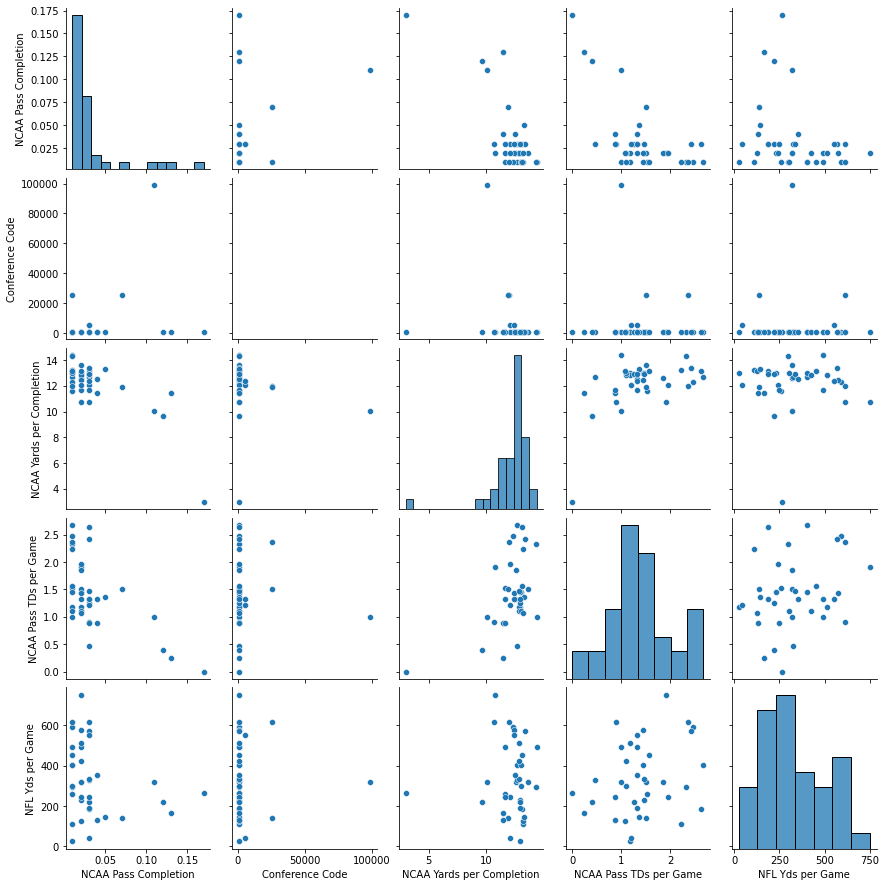

In [5]:
qbs = qbs[qbs['NFL Yds per Game']<1000] # filter for nfl passing yd/game less than 1000
sns.pairplot(qbs)

We've gotten rid of the outliers, and it looks like there may be a moderate, although somewhat weak, linear relationship between the NFL stat and NCAA Pass TDs per Game as can be seen in the second to last scatterplot in the output above.

Now we can start making our model. First we need to define what the x (predictor) and y (response) variables are. We are going to change these throughout the modelling process as we figure out which predictors are most appropriate to keep in the model. We'll scale the x-values since the predictors are on different scaled (percentage and one or two digit numbers).

To make the model we need to import another function from sklearn: train_test_split. We'll use this to split the quarterback dataframe into training and testing parts. The training part will be used to make the model, then it'll test the model using the testing portion of the dataframe. 

We'll assign a variable (reg) to the model then call the reg.fit function to make the model using the training data. We'll then print out the coefficients, the intercept value, and R^2 value for when we fit the model to the training data and R^2 for when we fit the model to the testing data. The coefficients tell us how impactful each of the predictor variables are, and the R^2 value tells how much of the variation in the data the model explains.

In [36]:
# define x and y values
x_values = qbs[['NCAA Pass TDs per Game', 'NCAA Pass Completion', 'NCAA Yards per Completion']]
y_values = qbs['NFL Yds per Game']
scaled_x_values = scale.fit_transform(x_values)

# call function to split data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_x_values, y_values, test_size=0.4, random_state=1)

# use functions to fit a model using the training data
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

print(reg.coef_)                    # print coefficients
print(reg.intercept_)               # print intercept
print(reg.score(X_train, y_train))  # print R^2 value for fitting model to training data
print(reg.score(X_test, y_test))    # print R^2 value for fitting model to testing data

[ 32.66344533 -73.75369411 -72.07595378]
333.32195851345523
0.17551691663861158
0.1810192462995438


Our model is as follows:

expected predicted NFL yards per game = 819.71 + (51.96*NCAA Pass TDs per game) (-2040.36*NCAA Pass Completion) + (-40.18*NCAA Yards per Completion) 

The R^2 value is .175 for the testing data and .18 for the training data, which indicates that the model only explains about 18% of the variation in NFL passing yards per game around the mean number of passing yards. College statistics do not appear to be the best measure of skill when trying to predict this NFL statistic for quarterbacks.

Based on what we've already done we can abstract our work into a function that we'll use to make more models.

In [7]:
# make a function to make linear models by passing in the x and y values as parameters
def make_model ( xs, ys ):            
    X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.4, random_state=1)    # split the data into training and testing
    reg = linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    return reg.coef_, reg.intercept_, reg.score(X_train, y_train), reg.score(X_test, y_test)      # print out the coefficients, intercept, r^2 for training data fit and r^2 for testing data fit

The function above will allow us to pass in x and y values, fit a model to the data, and then give us the coefficients, intercept, and R^2 values for fitting the model to both the testing and training data.

Now we'll start making models for receivers. Wide Receivers and Tight Ends have similar statistics, so we'll group them together to ensure we have sufficient data points for making a model.

We'll make a new receivers dataframe (recs) that includes only players who play these positions then print information about it.

In [8]:
recs = college_nfl_stats2[college_nfl_stats2['position'].isin(['WR', 'TE'])]
recs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 2 to 613
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   playerId                        176 non-null    int64  
 1   nameFirst                       176 non-null    object 
 2   nameLast                        176 non-null    object 
 3   position                        176 non-null    object 
 4   collegeId                       176 non-null    int64  
 5   Games played                    176 non-null    int64  
 6   nflId                           176 non-null    int64  
 7   Player Code                     176 non-null    int64  
 8   Team Code                       176 non-null    int64  
 9   Conference Code                 176 non-null    int64  
 10  NFL Forced Fumbles              176 non-null    float64
 11  NFL Fumble Turnover             176 non-null    float64
 12  NFL Interceptions               176 

The recs dataframe has 176 players who were tight ends or receivers. Some of the columns contain very few non-null values, which indicates that there's no data for them. We'll consider removing these when we decide which NCAA stats might be useful in predicting an NFL stat.

Let's make a copy of this dataframe so that we have one to use for our first model. We'll try to make a model that predicts NFL reception yards per game, so we'll need to make a new column. We can divide the NFL reception yards column by the Games played column to do so.

Then we'll change the recs2 dataframe to keep only the columns we need that make sense to predict this NFL statistic. We plan on using Conference Code to develop the model, so we'll change its data type to object. We're going to use another pairplot to get an idea of how these statistics relate to each other.

In [9]:
recs2 = recs.copy()
recs2['NFL Reception yds per Game'] = recs2['NFL Reception Yards']/recs2['Games played']    # make the reception yards per game column for all players
recs2['Conference Code'] = recs2['Conference Code'].astype(object)                          # change the conference code to data type object

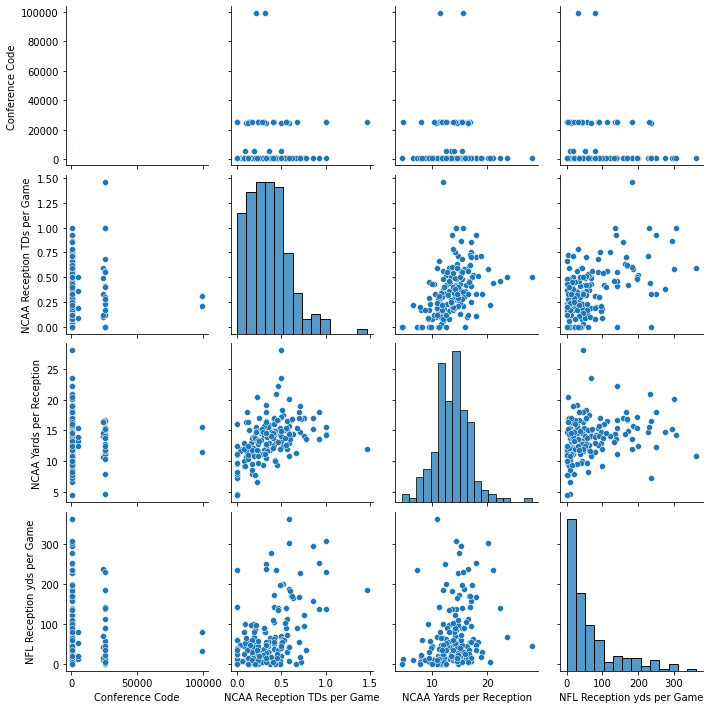

In [10]:
# filter only for columns with statistics that pertain to these positions
recs2 = recs2[['Conference Code',
       'NCAA Reception TDs per Game', 'NCAA Yards per Reception', 
       'NFL Reception yds per Game']]

# make a pairplot
sns.pairplot(recs2)

We've made a new column for NFL Reception yards, kept only the columns we're interested in using for the model, and printed out the pair plot.

The last row of the pairplot shows scatterplots for the NFL stat plotted against the four college stats we kept in the recs dataframe. We see that there may not be a strong linear trend between NFL reception yards per game and any of the NCAA statistics as the data points are clumped in a certain are for college reception TDs per game and yards per reception.

There does seem to be an outlier for NFL Reception yards per game, so we're going to filter that column for values less than 300 yards and print the pairplot again.

In [11]:
recs2 = recs2[recs2['NFL Reception yds per Game']<300]

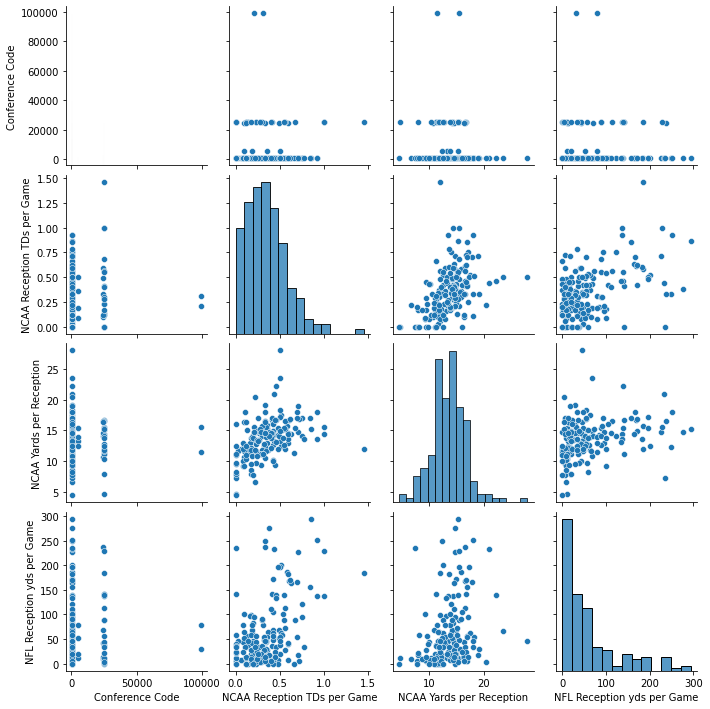

In [12]:
sns.pairplot(recs2)

Now that we've filtered the dataframe for NFL Reception yards per Game to be less than 300, we've spread out the data points a little more. The last row of the pairplot shows scatterplots for the NFL stat plotted against the four college stats we kept in the recs dataframe. We see that there may not be a strong linear trend between NFL reception yards per game and any of the NCAA statistics as the data points are clumped in a certain are for college reception TDs per game and yards per reception.

Let's define the predictor and response variables for the model. We'll use all of the NCAA stats to start with then change them as needed based on the R^2 values for the models. We're also going to scale the x-values since they're on different scales. Then we'll call our make_model function to fit a model to the data.

In [34]:
# set x and y values
x_values_rec = recs2[['NCAA Reception TDs per Game',
                    'NCAA Yards per Reception']]
y_values_rec = recs2['NFL Reception yds per Game']
scaled_x_values_rec = scale.fit_transform(x_values_rec)

# fit a model to the data
recs2_model = make_model(scaled_x_values_rec, y_values_rec)
recs2_model

(array([32.40994772,  5.03029333]),
 59.66842766005265,
 0.23894367880886502,
 0.19635954129734368)

Our model is as follows: predicted NFL reception yards per game = -9.86 + (138.23*NCAA reception TDs per game) + (1.58*NCAA yards per reception)

When we fit the model to the training data, we get an R^2 of .239. We get an R^2 value of .196 when we fit the model to our testing data.

The R^2 values are not overly strong, but the model does show potential for predicting NFL reception yards per game based on these college statistics. 

We'll transition to make a model that predicts statistics for running backs, so let's make a dataframe that includes only players who were running backs. We'll replace all infinity values with 0s again to avoid errors in the model. Then we'll make a copy of the dataframe that we can manipulate and print out the column names.

In [14]:
# filter for only running backs
rbs = college_nfl_stats2[college_nfl_stats2['position']=='RB']

# replace inf values
rbs = rbs.replace(to_replace=[np.inf, -np.inf], value=0)

# copy the df and print out first few rows
rbs2 = rbs.copy()
rbs2

,playerId,nameFirst,nameLast,position,collegeId,Games played,nflId,Player Code,Team Code,Conference Code,...,NCAA Yards per Reception,NCAA Solo Tackle per Game,NCAA Assisted Tackle per Game,NCAA Tackle for Loss per Game,NCAA Yards per Tackle for Loss,NCAA Sacks per Game,NCAA Yards per Sack,NCAA Forced Fumbles per Game,NCAA Fumbles per Game,NCAA Broken up Pass per Game
1,20130187,Andre,Ellington,RB,29631,35,2539217,1015945,147,821,...,8.58,0.08,0.00,0.0,NaN,0.0,NaN,0.00,0.18,0.0
5,20110573,Robert,Hughes,RB,46556,21,2530516,1010435,513,99001,...,8.82,0.00,0.00,0.0,NaN,0.0,NaN,0.00,0.12,0.0
13,20140840,Damien,Thigpen,RB,90095,3,2550769,1023477,110,905,...,8.61,0.44,0.06,0.0,NaN,0.0,NaN,0.06,0.09,0.0
17,20130230,Kerwynn,Williams,RB,84322,32,2539980,1026750,731,923,...,13.59,0.10,0.02,0.0,NaN,0.0,NaN,0.00,0.14,0.0
18,20140201,Marion,Grice,RB,85287,15,2543690,1046223,28,905,...,9.48,0.12,0.08,0.0,NaN,0.0,NaN,0.00,0.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,20170179,T.J.,Logan,RB,27599,17,2558273,1056317,457,821,...,12.40,0.00,0.00,0.0,NaN,0.0,NaN,0.00,0.11,0.0
548,20160156,Jonathan,Williams,RB,72701,15,2555227,1046342,31,911,...,18.67,0.13,0.00,0.0,NaN,0.0,NaN,0.00,0.22,0.0
549,20170907,Josh,Rounds,RB,70118,4,2559448,1049880,718,24312,...,5.50,0.00,0.00,0.0,NaN,0.0,NaN,0.00,0.05,0.0
556,20170132,Donnel,Pumphrey,RB,92115,8,2558850,1057111,626,5486,...,10.64,0.00,0.00,0.0,NaN,0.0,NaN,0.00,0.15,0.0


So now we have a dataframe with statistics for just the 45 running backs in the dataframe. Again, a lot of these columns have 0s because these statistics weren't recorded for running backs. We should consider other columns when deciding on which NCAA statistics could be useful in making a model.

Based on the columns, it makes the most sense to try and predict the number of rushing yards per game for a running back. 

Let's make a new column that has rushing yards per NFL game by dividing total NFL rushing yards by the number of games played. We'll print out the columns to make sure that we made this new column.

In [15]:
rbs2['NFL Rushing Yds per Game'] = rbs2['NFL Rushing Yards']/rbs2['Games played']
rbs2.columns

Index(['playerId', 'nameFirst', 'nameLast', 'position', 'collegeId',
       'Games played', 'nflId', 'Player Code', 'Team Code', 'Conference Code',
       'NFL Forced Fumbles', 'NFL Fumble Turnover', 'NFL Interceptions',
       'NFL Interception Yards', 'NFL Passing Yards', 'passAtt', 'passComp',
       'NFL Passing TDs', 'NFL Pass Interceptions', 'NFL Yards per Completion',
       'NFL Receptions', 'NFL Reception Yards', 'NFL Fumble on Reception',
       'NFL Rushing Yards', 'NFL Rushing TDs', 'NFL Sacks', 'NFL Sack Yards',
       'NFL Tackles', 'NCAA Games played', 'NCAA Yards per Carry',
       'NCAA Rush TDs per Game', 'NCAA Pass Completion',
       'NCAA Yards per Completion', 'NCAA Pass TDs per Game',
       'NCAA Reception TDs per Game', 'NCAA Yards per Reception',
       'NCAA Solo Tackle per Game', 'NCAA Assisted Tackle per Game',
       'NCAA Tackle for Loss per Game', 'NCAA Yards per Tackle for Loss',
       'NCAA Sacks per Game', 'NCAA Yards per Sack',
       'NCAA Forced F

We know that now we have a column with NFL rushing yards per game for every receiver.

We're going to change the dataframe to include only the response variable and the college statistics that make sense in predicting this NFL statistic. We'll keep NCAA yards per carry, NCAA rushing TDs per game, NCAA fumbles per game and NFL rushing yds per game.

We'll make a pairplot to inspect how these variables might be related to each other.

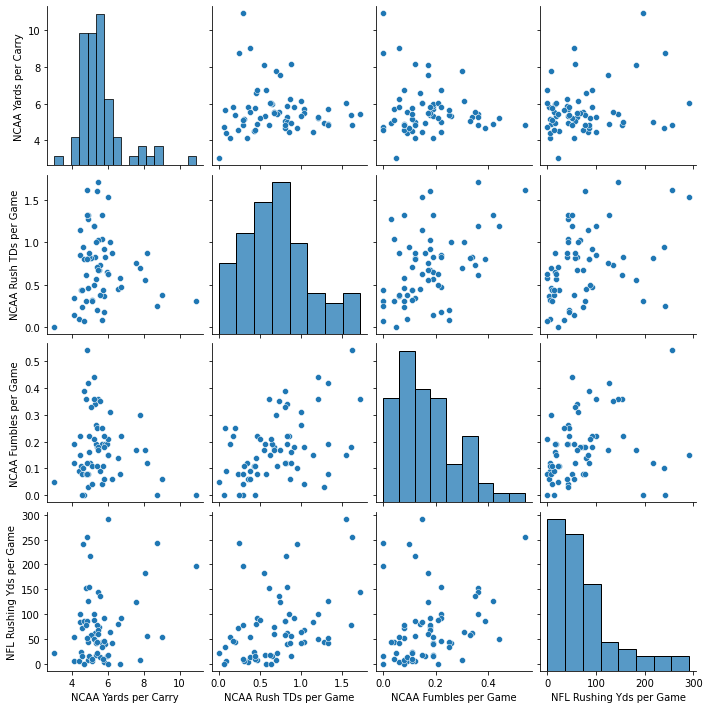

In [16]:
# filter for just the rows we want
rbs2 = rbs2[['NCAA Yards per Carry', 'NCAA Rush TDs per Game', 'NCAA Fumbles per Game', 'NFL Rushing Yds per Game']]

# make a pairplot
sns.pairplot(rbs2)

Based on the pairplot, we know that the rbs2 dataframe now contains only the columns we're interested in using for the model.

If we look at the very bottom row of the pairplot, which shows scatterplots for the NFL and college statistics plotted against each other, we see that there aren't any strong linear relationships between NFL rushing yds per game and each of the NCAA statistics. This suggests that these college stats may not be very useful in predicting NFL rushing yards per game.

We'll define our predictor (x_values2) and response (y_values2) variables for the model. We started with all three NCAA stats in the dataframe and changed them based on the output of the model. We're going to scale the x values here because they are very different units (decimals for rush tds and fumbles) than the outcome variable.

We'll call our make_model function and pass in those x and y values as the parameters and get our fitted model and R^2 values.

In [27]:
x_values2 = rbs2[['NCAA Rush TDs per Game', 'NCAA Fumbles per Game']]
y_values2 = rbs2['NFL Rushing Yds per Game']
scaled_x_values2 = scale.fit_transform(x_values2)

rbs2_model = make_model(scaled_x_values2, y_values2)
rbs2_model

(array([38.09456203, 15.02753712]),
 69.21978985737934,
 0.34240500410401686,
 -0.5875826287430796)

Based on the output above, our model is as follows:

predicted NFL rushing yards per game = -19.22 + (93.14*NCAA rushing TDs per game) + (128.34*NCAA fumbles per game)

The R^2 value is 0.34 when we fit the model to the training data and is -.58 when we fit the model to the testing data. 

The R^2 value for fitting the model to the training data suggests that the model is not a good predictor for this NFL statistic, and it appears that we cannot make an interesting prediction for the number of rushing yards a running back has in an NFL game.

We will now try to make a model that predicts statistics for defensive positions. Let's make a data frame with the positions Defensive Tackle, Line Backer, Defensive End, Outside Line Backer, and Defensive Lineman. These positions typically have pretty similar statistics.

In [18]:
defense = college_nfl_stats2[college_nfl_stats2['position'].isin(['DT', 'LB', 'DE', 'OLB', 'DL'])]
defense

,playerId,nameFirst,nameLast,position,collegeId,Games played,nflId,Player Code,Team Code,Conference Code,...,NCAA Yards per Reception,NCAA Solo Tackle per Game,NCAA Assisted Tackle per Game,NCAA Tackle for Loss per Game,NCAA Yards per Tackle for Loss,NCAA Sacks per Game,NCAA Yards per Sack,NCAA Forced Fumbles per Game,NCAA Fumbles per Game,NCAA Broken up Pass per Game
132,20120568,Drew,Nowak,DT,49008,4,2535836,1019432,774,875,...,NaN,1.73,2.36,0.70,3.77,0.25,6.36,0.05,0.0,0.02
157,20110449,Mario,Harvey,LB,25755,7,2530511,1009659,388,24312,...,NaN,4.24,5.65,0.86,5.06,0.51,7.05,0.11,0.0,0.22
169,20140203,Andrew,Jackson,LB,42101,18,2550153,1034982,772,853,...,NaN,4.89,4.17,1.19,3.12,0.18,6.31,0.14,0.0,0.11
220,20140084,Kareem,Martin,DE,27599,43,2543738,1032955,457,821,...,NaN,2.00,1.87,0.99,4.02,0.42,6.77,0.09,0.0,0.28
221,20140402,Glenn,Carson,LB,16802,10,2550324,1033567,539,827,...,NaN,2.83,3.54,0.22,2.78,0.05,4.00,0.05,0.0,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,20160645,Farrington,Huguenin,DE,40506,8,2556561,1039962,334,911,...,NaN,1.17,0.92,0.00,NaN,0.00,NaN,0.00,0.0,0.08
601,20170847,C.J.,Robbins,DL,60208,4,2559350,1040874,509,827,...,NaN,0.40,0.40,0.10,10.00,0.10,10.00,0.00,0.0,0.20
604,20170772,Nelson,Adams,DL,39762,3,2559130,1048207,430,911,...,NaN,0.33,0.89,0.17,0.67,0.00,NaN,0.00,0.0,0.00
612,20180922,A.J.,Johnson,LB,37998,20,2561704,1041674,694,911,...,NaN,4.44,4.56,0.60,2.28,0.03,10.00,0.03,0.0,0.11


Now we have a dataframe that consists of these 5 positions, and we can use it for the model. Based on the columns we have available and their statistics, it might make sense to see if we can predict tackles per game in the NFL.

We'll make a copy of the dataframe and manipulate it for the model. We'll make a new column for NFL tackles per game by dividing the number of total NFL tackles by the number of games played. We make sure to fill in the negative infinity and infinity with zero's so we don't get errors when making the model. After this we print out the column titles to make sure our new column has been added. 

In [19]:
# make a copy of the dataframe and then make a new column in the copy for NFL tackles per game
defense1 = defense.copy()
defense1['NFL Tackles per Game'] = defense1['NFL Tackles']/ defense1['Games played']

# replace infinity values
defense1 = defense1.replace(to_replace=[np.inf, -np.inf, np.nan], value=0)

#print columns
defense1.columns

Index(['playerId', 'nameFirst', 'nameLast', 'position', 'collegeId',
       'Games played', 'nflId', 'Player Code', 'Team Code', 'Conference Code',
       'NFL Forced Fumbles', 'NFL Fumble Turnover', 'NFL Interceptions',
       'NFL Interception Yards', 'NFL Passing Yards', 'passAtt', 'passComp',
       'NFL Passing TDs', 'NFL Pass Interceptions', 'NFL Yards per Completion',
       'NFL Receptions', 'NFL Reception Yards', 'NFL Fumble on Reception',
       'NFL Rushing Yards', 'NFL Rushing TDs', 'NFL Sacks', 'NFL Sack Yards',
       'NFL Tackles', 'NCAA Games played', 'NCAA Yards per Carry',
       'NCAA Rush TDs per Game', 'NCAA Pass Completion',
       'NCAA Yards per Completion', 'NCAA Pass TDs per Game',
       'NCAA Reception TDs per Game', 'NCAA Yards per Reception',
       'NCAA Solo Tackle per Game', 'NCAA Assisted Tackle per Game',
       'NCAA Tackle for Loss per Game', 'NCAA Yards per Tackle for Loss',
       'NCAA Sacks per Game', 'NCAA Yards per Sack',
       'NCAA Forced F

We now see that we have added a new column with the number of NFL tackles per game. Some of the columns sound like they'll be more useful in building the model, and these same columns had statistics (rather than 0s) in the defense dataframe.

We'll change the dataframe to only have the NFL stat and the college statistics that make sense for predictions: NCAA solo tackles per game, NCAA assisted tackles per game, NCAA tackle for loss per game, NCAA yards per tackle for loss, NCAA sacks per game, NCAA yards per sack, NCAA forced fumbles per game. 

Then we can make a pairplot to see if any of these variables appear to be related to each other. 

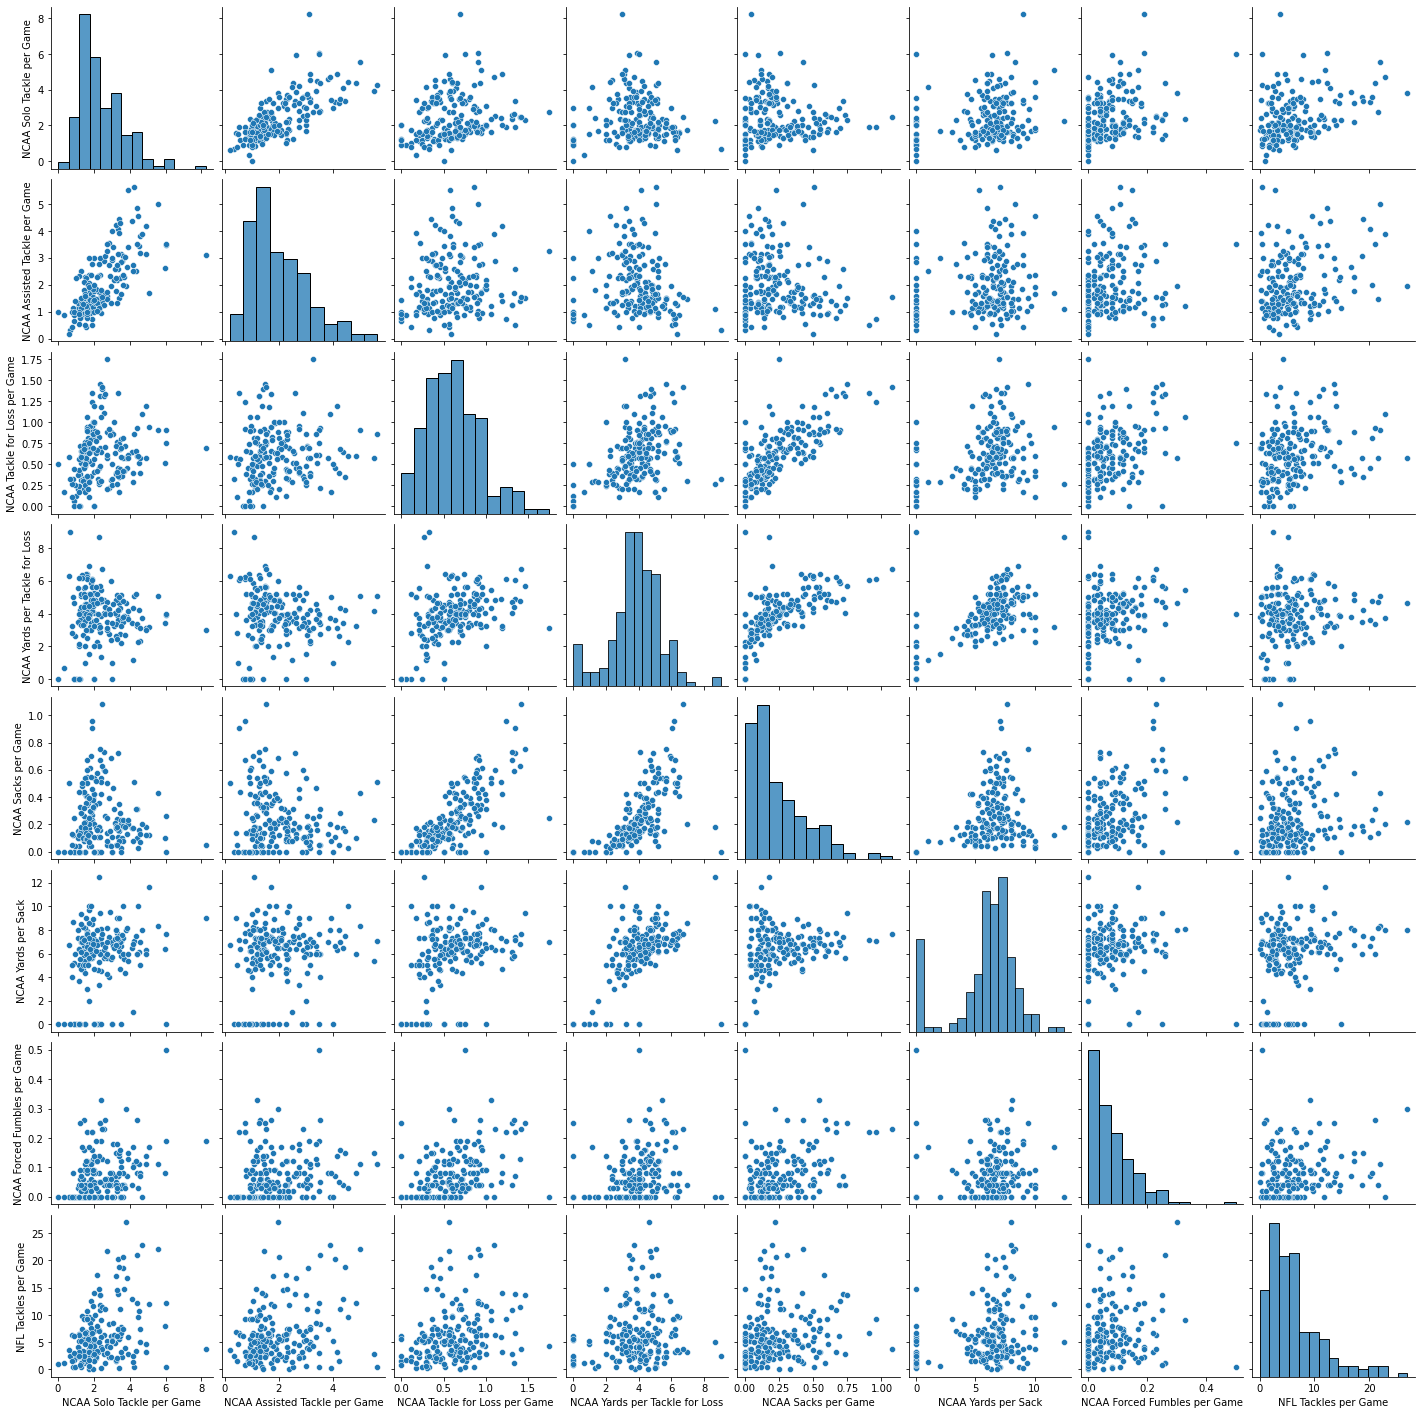

In [20]:
# filter only for columns that make sense to use
defense1 = defense1[['NCAA Solo Tackle per Game', 'NCAA Assisted Tackle per Game',
       'NCAA Tackle for Loss per Game', 'NCAA Yards per Tackle for Loss',
       'NCAA Sacks per Game', 'NCAA Yards per Sack',
       'NCAA Forced Fumbles per Game', 'NFL Tackles per Game']]


defense1 = defense1[defense1['NFL Tackles per Game']<30]
defense1 = defense1[defense1['NCAA Yards per Tackle for Loss']<10]
sns.pairplot(defense1)

Based on the pairlot, the defense1 dataframe now only has the columns we are looking for in the model. 

If we look at the very bottom row of the pairplot, we can see the college stats plotted against the outcome variable. None of the plots show a strong linear relationship between the predictor and response variable as most of them are clumped together in one spot and show some random spread. 

We'll now define our predictor (x_values4) and response (y_values4) variables for the model. Again, we started with all of the college stats in the dataframe but kept eliminating some based on the outcome for the model until we got our best-fitting model. 

We can call our make_model function and pass in those x and y values as the parameters to see the coefficients, intercept, and R^2 values for the best model.

In [31]:
# define the x and y values
x_values4 = defense1[['NCAA Solo Tackle per Game',
       'NCAA Tackle for Loss per Game', 
       'NCAA Sacks per Game', 'NCAA Yards per Sack']]
y_values4 = defense1['NFL Tackles per Game']

# call make model function to get a model
defense_model = make_model(x_values4, y_values4)
defense_model

(array([ 1.208324  ,  3.44932844, -0.5419856 ,  0.09157264]),
 0.9775708466049142,
 0.1702827813643326,
 0.14256894950427812)

Based on our output above, the model is as follows:

predicted NFL tackles per game = 0.978+(1.21*NCAA Solo Tackle per Game) + (3.45*NCAA Tackle for loss per game) + (-0.54*NCAA Sacks per game) + (.0.09*NCAA yards per sack)

The R^2 value is 0.17 when we fit the model to the training data and is 0.143 when we fit the model to the testing data. These R^2 values are fairly low and suggest that using these statistics to predict the NFL statistic may not be the best way to assess how a player will perform in the NFL. 

Overall, there does not seem to be a very strong model that we can use for predicting NFL statistics based on a player's college statistics.